In [54]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression # Linear Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import mean_squared_error, r2_score #model evaluation

from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.model_selection import KFold # k-fold cv
from sklearn.model_selection import LeaveOneOut #LOO cv
from sklearn.model_selection import cross_val_score # cross validation metrics
from sklearn.model_selection import cross_val_predict # cross validation metrics


from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot as plt


%matplotlib inline

In [55]:
netflix = pd.read_csv("/Users/Davidaarhus/Documents/392_python/finalNetData.csv")
ratings_mean_votes = pd.read_csv("/Users/Davidaarhus/Documents/392_python/ratings_mean_votes.csv")
age_mean_votes = pd.read_csv("/Users/Davidaarhus/Documents/392_python/ageLvl_mean_votes.csv")
year_mean_votes = pd.read_csv("/Users/Davidaarhus/Documents/392_python/releaseYear_mean_votes.csv")
scoreRating_mean_votes = pd.read_csv("/Users/Davidaarhus/Documents/392_python/scoreRating_mean_votes.csv")
TVandMovie = pd.read_csv("/Users/Davidaarhus/Documents/310 R/Datasets/netflix_titles.csv")

In [3]:
netflix.head()

,title,genre,director,weighted_average_vote,country,release_year,rating,duration,Centry21,agelvl,Score_group
0,"¡Ay, mi madre!",Comedy,Frank Ariza,3.8,Spain,2019,TV-MA,81,1,Adult,Ok
1,#Roxy,Multiple,Michael Kennedy,5.2,Canada,2018,TV-14,105,1,Teen,Ok
2,1 Chance 2 Dance,Multiple,Adam Deyoe,4.8,United States,2014,TV-PG,89,1,Kid,Ok
3,1 Mile to You,Multiple,Leif Tilden,6.3,United States,2017,TV-14,105,1,Teen,Good
4,10 jours en or,Multiple,Nicolas Brossette,5.8,France,2012,TV-PG,97,1,Kid,Good


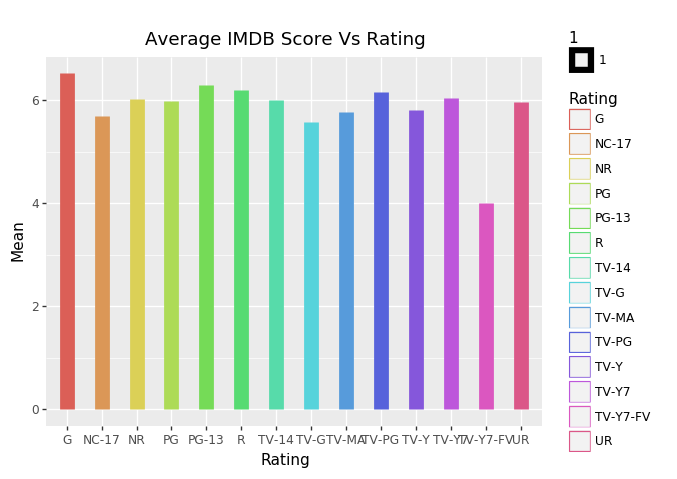

<ggplot: (305988237)>

In [21]:
(ggplot(ratings_mean_votes, aes("Rating", "Mean", color = "Rating")) 
 + geom_density(aes(size = 1))
 + ggtitle("Average IMDB Score Vs Rating"))

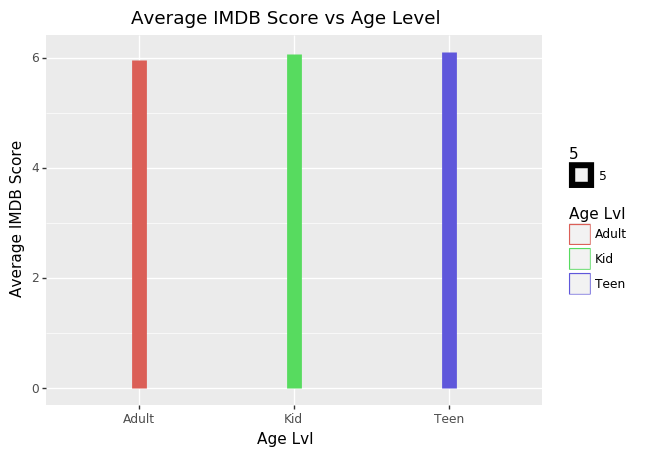

<ggplot: (306915393)>

In [23]:
(ggplot(age_mean_votes, aes("Age Lvl", "Mean",color = "Age Lvl")) 
 + geom_density(aes(size = 5))
 + ylab("Average IMDB Score")
 + ggtitle("Average IMDB Score vs Age Level"))

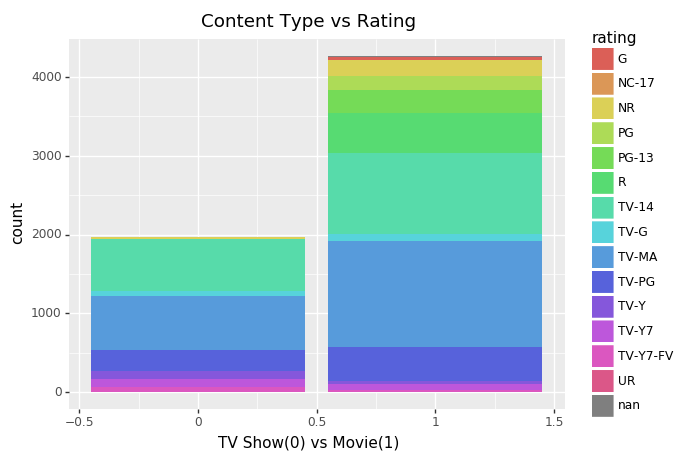

<ggplot: (307315045)>

In [62]:
(ggplot(TVandMovie, aes("typeMovie", fill = "rating")) 
 + geom_bar()
 + xlab("TV Show(0) vs Movie(1)")
 + ggtitle("Content Type vs Rating"))

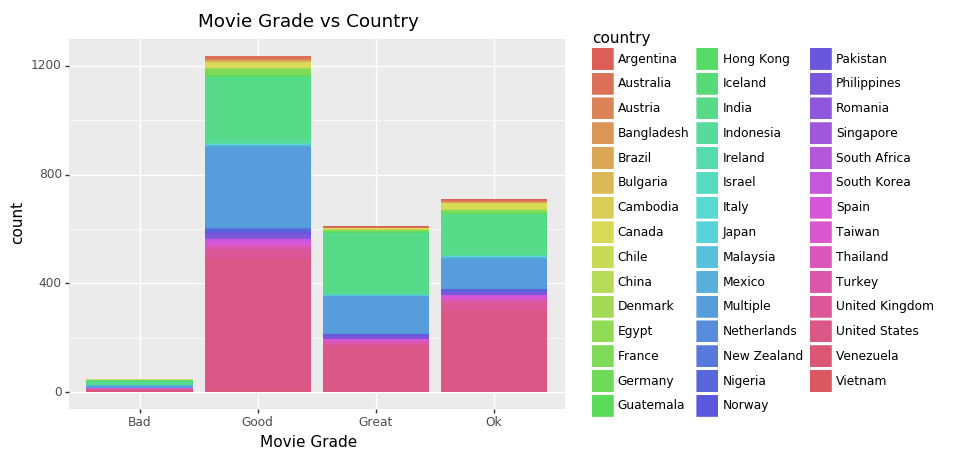

<ggplot: (305243941)>

In [4]:
(ggplot(netflix, aes("Score_group", fill = "country" )) 
 + geom_bar()
 + xlab("Movie Grade")
 + ggtitle("Movie Grade vs Country"))


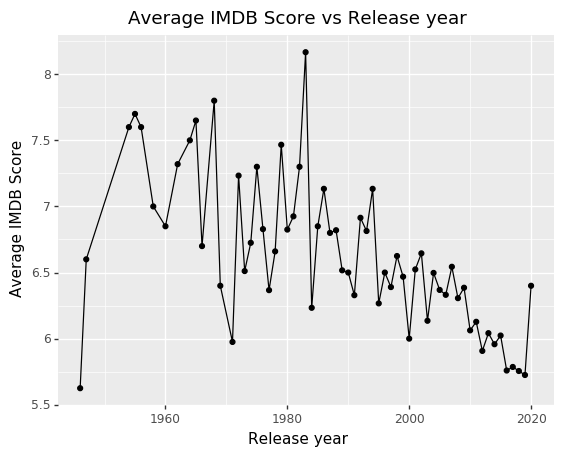

<ggplot: (306392925)>

In [57]:
(ggplot(year_mean_votes, aes("Release year","Mean")) 
 + geom_point(aes())
 + geom_line()
 + ylab("Average IMDB Score")
 + ggtitle("Average IMDB Score vs Release year"))

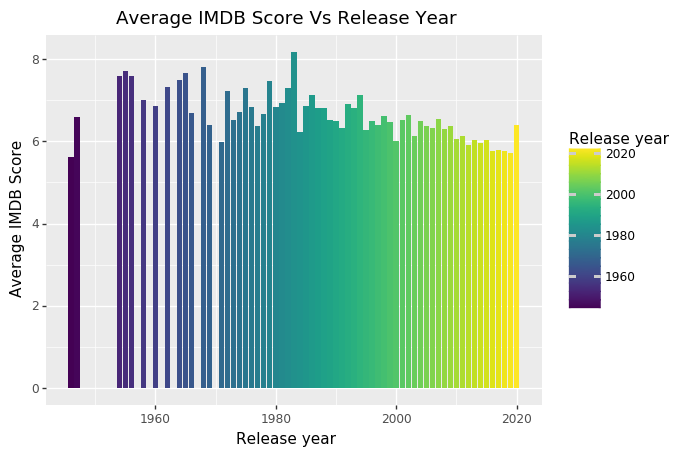

<ggplot: (308043453)>

In [46]:
(ggplot(year_mean_votes, aes("Release year", "Mean", fill = "Release year")) 
 + geom_bar(stat = "identity")
 + ggtitle("Average IMDB Score Vs Release Year")
 + ylab("Average IMDB Score"))
 

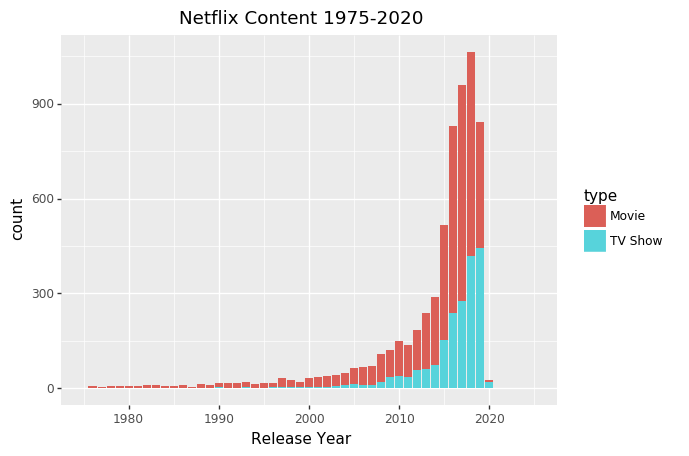

<ggplot: (308166249)>

In [53]:
(ggplot(TVandMovie, aes("release_year")) 
 + geom_bar(aes(fill = "type"))
 + xlim(1975,2025)
 + ggtitle("Netflix Content 1975-2020")
 + xlab("Release Year"))


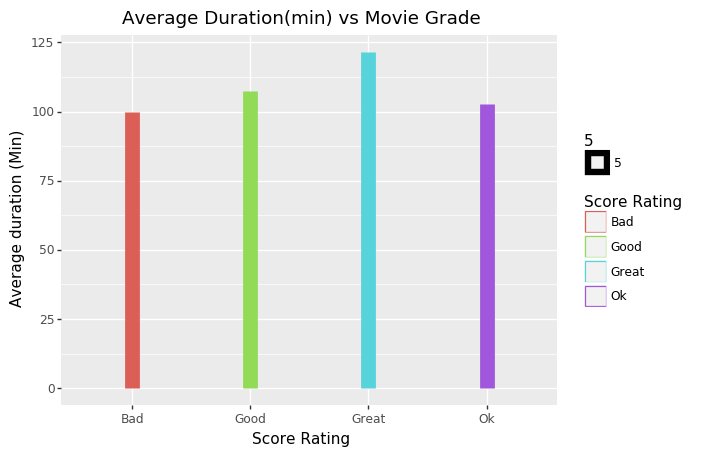

<ggplot: (306732649)>

In [24]:
(ggplot(scoreRating_mean_votes, aes("Score Rating", "Duration",color = "Score Rating")) 
 + geom_density(aes(size = 5))
 + ylab("Average duration (Min)")
 + ggtitle("Average Duration(min) vs Movie Grade"))

## Hierarchical model

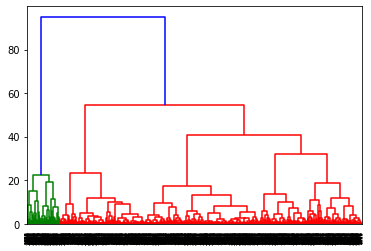

In [29]:
features = ["weighted_average_vote", "release_year", "duration", "Centry21"]
X = netflix[features]
z = StandardScaler()
X[features] = z.fit_transform(X)

hac = AgglomerativeClustering(affinity = "euclidean",
                             linkage = "ward")
hac.fit(X)
dendro = sch.dendrogram(sch.linkage(X, method='ward'))

In [30]:
hac = AgglomerativeClustering(n_clusters =2,
                              affinity = "euclidean",
                             linkage = "ward")
hac.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2)

In [31]:
membership = hac.labels_
membership

array([0, 0, 0, ..., 0, 0, 0])

In [32]:
silhouette_score(X,membership)

0.6202046171846157

In [34]:
netflix["cluster2"] = membership

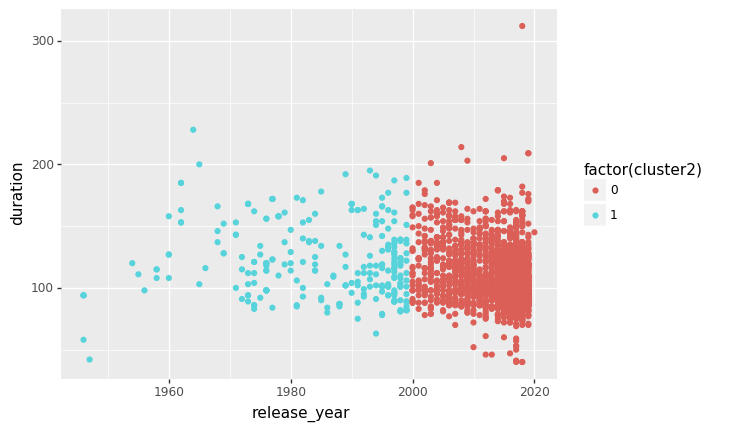

<ggplot: (314326861)>

In [38]:
(ggplot(netflix, aes(x = "release_year", y = "duration")) + geom_point(aes(color = "factor(cluster2)")))
